## SHIVANI GOYAL
### R00183301 | Python Project - 1

### INTRODUCTION

IMDB movie Dataset consists data for 5043 movies. The dataset has 28 features from which 16 are numerical and remaining 12 as categorical variables. This data has been taken from Kaggle.   

**Below are the libraries used while working on this project.**

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
#below are the libraries used for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data from file 'movie_metadata.csv' using pandas function read_csv method.**

In [2]:
#read the "movie_metadata" dataset and stored as "movie_data"
movie_data = pd.read_csv('movie_metadata.csv')
#to check detailed information of dataset
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### PREPROCESSING OF DATA

**1. DEALING WITH NAN's i.e. MISSING DATA**

There are many ways to deal with Null values. Here, the most common method of removing the rows having null values has been implemented.

In [3]:
#to check the count of null values
movie_data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
#to remove null values
movie_data = movie_data.dropna()
#to check detailed information of dataset
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [5]:
# to re-check the count of null values
movie_data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Now, we can see that here all the null values has been removed as the count of null values for each feature (column) is 0.

**2. DATA CLEANING - Removing unnecessary special characters**

In [6]:
#outputs the 2nd movie_title of movie_data before data cleaning
movie_data['movie_title'][1]

"Pirates of the Caribbean: At World's End\xa0"

In [7]:
#Removes all the special characters from the column 'movie_title' of 'movie_data' dataset
movie_data['movie_title'] = movie_data['movie_title'].str.replace('\W', '')

In [8]:
#outputs the 2nd movie_title of movie_data after data cleaning
movie_data['movie_title'][1]

'PiratesoftheCaribbeanAtWorldsEnd'

### Menu Option 1 – Most successful directors or actors

This is the first menu option of the Application. <br>
Created function called successfullDirectorsActors() for this menu. <br>
From this menu, the user can check the name of Top Directors or Top Actors as per their gross film earnings. <br>
The user has to specify the number of Directors or Actors. <br>
Based on the number user selects, code will output the list of Top Directors/Actors and a horizontal bar Graph respectively.

**CODE IS GIVEN BELOW**

Please choose any one option: 
 1. Top Directors 
 2. Top Actors 
 1
Enter the number of top directors to be displayed 
7

The top  7 directors with highest gross earnings are 
            director_name         gross
1492   Steven Spielberg  4.114233e+09
1229      Peter Jackson  2.289968e+09
1038        Michael Bay  2.231243e+09
1536         Tim Burton  2.071275e+09
1398          Sam Raimi  2.049549e+09
620       James Cameron  1.948126e+09
251   Christopher Nolan  1.813228e+09


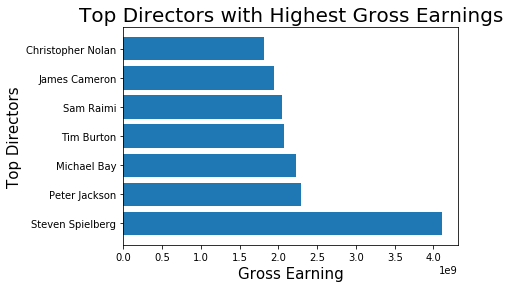

In [9]:
#CODE FOR MENU OPTION 1 :-

#creates the function named 'successfullDirectorsActors()'
def successfullDirectorsActors():
    while True:  #this loop will keep on continuing until the user gets the desired output and breaks out
        
#         Asks the user to choose one option and stores in "num" variable as integer
        num = int(input("Please choose any one option: \n 1. Top Directors \n 2. Top Actors \n "))
    
#         If the user chooses the option other than 1 and 2, gives error.Also will ask the user to try again
        if num > 2 or num <=0:
            print("Incorrect option. Please try again")
            continue  #will go back to the first line of the loop
            
#        If the user chooses option 1
        elif num == 1:
        
#        Asks to enter the number of directors the user wants and stores in "top_Dir" variable as integer
            top_Dir = int(input("Enter the number of top directors to be displayed \n"))
    
#        If the number of directors falls in the range of 0 to 1660 i.e.(the number of directors in the dataset),'if' loop will work
#        If the number of directors does not falls in the range, 'else' loop will be executed
            if top_Dir <1660 and top_Dir >=0:
        
#        lists the "director_name" along with the sum of their "gross" earnings respectively and stores in a "df" as a dataframe
#        Arranges the output of "df" in descending order i.e the directors with highest gross value will appears on top.
                df = movie_data.groupby(['director_name'], as_index=False)['gross'].sum()
                df.sort_values(['gross'], ascending = False, inplace = True)
                
#        Returns the 0 to "top_Dir" number of rows of "df" and stores the output dataframe as "top_directors" 
                top_directors = df[0:top_Dir]
    
#        Displays the list of user specified number of top director with respect to the gross film earnings
                print("\nThe top ",top_Dir, "directors with highest gross earnings are \n ", top_directors )

#        Plots horizontal bar chart such that top directors on y-axis and their respective gross earnings on x-axis.

#        Creating an array for number of bars in a graph which is the number of top directors asked by the user
                y_pos = np.arange(len(top_directors['director_name'])) 
                plt.barh(y_pos, top_directors['gross'],align='center')  #plots the horizontal bar chart
                plt.yticks(y_pos, top_directors['director_name'])  #mapps the y_pos array with the 'director_name' column of top_directors dataframe
                plt.xlabel('Gross Earning', fontsize = 15)  #assigns the name of x-axis
                plt.ylabel('Top Directors', fontsize = 15)  #assigns the name of y-axis
                plt.title("Top Directors with Highest Gross Earnings", fontsize = 20) #assigns the title to plot
                plt.show()  #plots the graph
                break  #breaks the loop as the user gets the specified output
                
            else: #user inputs the number of directors does not exists in the dataset
                
#      Displays the error message and asks the user to re-enter in the specified range of number of directors                   
                print("Invalid Range! Please enter between 0 to 1659")
                continue  #will go back to the first line of the loop
                
#        If the user chooses option 2
        elif num == 2:
        
#        Asks to enter the number of actors the user wants and stores in "top_A" variable as integer        
            top_A = int(input("Enter the number of top actors to be displayed \n "))
    

#        If the number of Actors falls in the range of 0 to 467 i.e.(the number of actors in the dataset),if loop will work
#        If the number of Actors does not falls in the range, else loop will be executed
    
            if top_A < 468 and top_A >= 0:
            
#        lists the uniquely "actor_1_name" along with the sum of their "gross" earnings respectively and stores in a "actor1" as a dataframe
#        Renames the columns of "actor1"             
                actor1 = movie_data.groupby(['actor_1_name'], as_index=False)['gross'].sum()
                actor1.rename(columns = {'actor_1_name': 'actor_name', 'gross':"gross_1"}, inplace = True)

#        lists the uniquely "actor_2_name" along with the sum of their "gross" earnings respectively and stores in a "actor2" as a dataframe
#        Renames the columns of "actor2" 
                actor2 = movie_data.groupby(['actor_2_name'], as_index=False)['gross'].sum()
                actor2.rename(columns = {'actor_2_name': 'actor_name', 'gross':"gross_2"}, inplace = True)

#        lists the uniquely "actor_3_name" along with the sum of their "gross" earnings respectively and stores in a "actor3" as a dataframe
#        Renames the columns of "actor3"         
                actor3 = movie_data.groupby(['actor_3_name'], as_index=False)['gross'].sum()
                actor3.rename(columns = {'actor_3_name': 'actor_name', 'gross':"gross_3"}, inplace = True)
        
#        Merges the 'actor1' ,'actor2' & 'actor3' dataframes by common column 'actor_name' and stores in new dataframe say 'df'
                df = actor1.merge(actor2,on='actor_name').merge(actor3,on='actor_name')
    
#        Adds a new column in 'df' i.e. 'gross' which is the sum of 'gross_1' , 'gross_2' and 'gross_3' 
                df['gross'] = df['gross_1'] + df['gross_2'] + df['gross_3']

#        Arranges the output of "df" in descending order i.e the actors with highest gross value will appears on top                
                df.sort_values(['gross'], ascending = False, inplace = True)

#        Returns the 'Actor_Name' & 'Gross' columns of "df" from 0 to "top_A" number of rows  and stores the output dataframe as "top_actors"                 
                top_actors = df[['actor_name','gross']][0:top_A]
                
                
#        Displays the list of user specified number of top actors with respect to the gross film earnings
                print("\nThe top ",top_A, "actors with Highest Gross Earnings are \n ", top_actors )
                
#        Plots horizontal bar chart such that top Actors on y-axis and their respective gross earnings on x-axis.

#        Creating an array for number of bars in a graph which is the number of top actors asked by the user
                y_pos = np.arange(len(top_actors['actor_name']))
                plt.barh(y_pos, top_actors['gross']) #plots the horizontal bar chart
                plt.yticks(y_pos, top_actors['actor_name']) #mapps the y_pos array with the 'director_name' column of top_directors dataframe
                plt.xlabel('Gross Earning',fontsize = 15)  #assigns the name of x-axis
                plt.ylabel('Top Actors', fontsize = 15)  #assigns the name of y-axis
                plt.title("Top Actors with highest Gross Earnings", fontsize = 20) #assigns the title to plot
                plt.show()  #plots the graph
                break #breaks the loop as the user gets the specified output
                
            else: #user inputs the number of actors does not exists in the dataset

 #      Displays the error message and asks the user to re-enter in the specified range of number of actors               
                print("Invalid Range! Please enter between 0 to 467") 
                continue #will go back to the first line of the loop
        
successfullDirectorsActors() #calls the function successfullDirectorsActors()

**ERROR HANDLING**<br>
The code does basic error handling.<br>
If the user inputs the invalid option or value, it gives error message to user and asks to try again. <br>

**OBSERVATION** <br>
For the given movie dataset, the Top Director is "STEVEN SPIELBERG" having Gross Film Earning of 4.114233e+09 dollars.<br>
For the given movie dataset, the Top Actor is "SCARLETT JOHANSSON" having Gross Film Earning of 4.141343e+09 dollars.<br>
Both Top Actor and Top Director has approximately same Gross Film Earnings.

### Menu Option 2 – Film Comparison

This is the second menu of the Application.<br>
Created function called filmComparision() for this menu. <br>
From this menu or say function, the user can compare the 2 films based on their IMDB Scores, Gross Earnings or Movie Facebook Like respectively.<br>
The user will be given to choose one of these three options.<br>
The comparision of these films is visually displayed by horizontal bar graph.<br>

**CODE IS GIVEN BELOW**

Please enter the names of 2 films: 
First Movie Name : Avatar
Second Movie Name: Tangled

Please choose any one option: 
 1. IMDB Scores 
 2. Gross Earning 
 3. Movie Facebook Like 
2


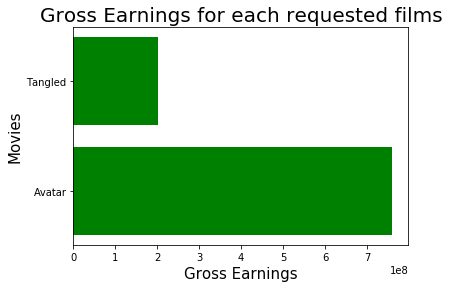

In [10]:
#CODE FOR MENU OPTION 2 :-

#Removes all the special characters from the column 'movie_title' of 'movie_data' dataset
movie_data['movie_title'] = movie_data['movie_title'].str.replace('\W', '')

#creates the function named filmComparision
def filmComparision():
    while True: #this loop will keep on continuing until the user gets the desired output and breaks out 
        
#   Asks the user to enter the 2 film names and stores first film name in "first_film" & second film name in "second_film" variable
        first_film = input("Please enter the names of 2 films: \nFirst Movie Name : ") 
        second_film = input("Second Movie Name: ")
        
#   If the user specified both movie names exists in the dataset i.e. both the film names are valid, than if loop will be executed        
        if len(movie_data[(movie_data.movie_title == first_film)])>0 and len(movie_data[(movie_data.movie_title == second_film)])> 0:  
#   Asks the user to choose any one of the option for which a bar graph will be displayed comparing the two films  
#   Stores this value as integer in "num" variable
            num = int(input("\nPlease choose any one option: \n 1. IMDB Scores \n 2. Gross Earning \n 3. Movie Facebook Like \n"))
    
#   If the user chooses the option other than 1,2 and 3, gives error.Also will ask the user to try again    
            if num > 3 or num <=0:
                print("Incorrect option. Please try again")
                continue  #will go back to the first line of the loop 
                
                
#   If the user selects option 1 i.e. IMDB Scores                
            elif num == 1:

#   Selects the subset of the columns i.e.'imdb_score' & 'movie_title' of dataframe having movie_tile as first_film or second_film stores in 'df' dataframe   
                df = movie_data[(movie_data.movie_title == first_film) | (movie_data.movie_title == second_film)][['imdb_score','movie_title']]
    
#   Plots horizontal bar chart such that Movies Name on y-axis and their respective IMDB Scores on x-axis.

#   Creating an array for number of bars in a graph which is the number of movie_title asked by the user    
                y_pos = np.arange(len(df['movie_title']))
                plt.barh(y_pos, df['imdb_score'], color = 'g')  #plots the horizontal bar chart
                plt.yticks(y_pos, df['movie_title'])  #mapps the y_pos array with the 'movie_title' column of 'df' dataframe
                plt.xlabel('IMDB Scores', fontsize = 15) #assigns the name of x-axis
                plt.ylabel('Movies', fontsize = 15)  #assigns the name of y-axis
                plt.title("IMDB Scores for each film", fontsize = 20)  #assigns the title to plot
                plt.show()  #plots the graph

#   If the user selects option 2 i.e. Gross Earning                
            elif num == 2:
        
#   Selects the subset of the columns i.e.'gross' & 'movie_title' of dataframe having movie_title as first_film or second_film stores in 'df1' dataframe          
                df1 = movie_data[(movie_data.movie_title == first_film) | (movie_data.movie_title == second_film)][['gross','movie_title']]
                
#   Plots horizontal bar chart such that Movies Name on y-axis and their respective Gross Earning on x-axis.

#   Creating an array for number of bars in a graph which is the number of movie_title asked by the user
                y_pos = np.arange(len(df1['movie_title']))  
                plt.barh(y_pos, df1['gross'], color = 'g')  #plots the horizontal bar chart
                plt.yticks(y_pos, df1['movie_title'])  #mapps the y_pos array with the 'movie_title' column of 'df' dataframe
                plt.xlabel('Gross Earnings', fontsize = 15)  #assigns the name of x-axis
                plt.ylabel('Movies', fontsize = 15)  #assigns the name of y-axis
                plt.title("Gross Earnings for each requested films", fontsize = 20)  #assigns the title to plot
                plt.show()  #plots the graph
                
#   If the user selects option 3 i.e. Movie Facebook Like                
            elif num == 3:
        
#   Selects the subset of the columns i.e.'gross' & 'movie_title' of dataframe having movie_title as first_film or second_film stores in 'df2' dataframe                  
                df2 = movie_data[(movie_data.movie_title == first_film) | (movie_data.movie_title == second_film)][['movie_facebook_likes','movie_title']]
               
#   Plots horizontal bar chart such that Movies Name on y-axis and their respective movie_facebook_likes on x-axis.

#   Creating an array for number of bars in a graph which is the number of movie_title asked by the user
                y_pos = np.arange(len(df2['movie_title']))
                plt.barh(y_pos, df2['movie_facebook_likes'], color = 'g')  #plots the horizontal bar chart
                plt.yticks(y_pos, df2['movie_title'])  #mapps the y_pos array with the 'movie_title' column of 'df' dataframe
                plt.xlabel('Number Of Facebook Likes', fontsize = 15)  #assigns the name of x-axis
                plt.ylabel('Movies', fontsize = 15)  #assigns the name of y-axis
                plt.title("Movie Facebook Likes for each requested films", fontsize = 20)  #assigns the title to plot
                plt.show()  #plots the graph

            break  #breaks the loop as the user gets the specified output
            
#   If any of the user specified film names does not exits in the dataset, Gives Error message and will ask to re-enter            
        else:
            print("Ivalid Movie Names!..Please enter a valid movie names \n")
            continue #will go back to the first line of the loop 
            
filmComparision()  #calls the function filmComparision

**ERROR HANDLING**<br>
Code does basic error handling as well.<br>
It will give an error message if any of the 2 film names given by user is not in the dataset. Also, will ask user to enter the 
valid movie names.<br>
It will give error message if the user chooses other than the 3 options provided i.e. IMDB Scores, Gross Earnings or Movie Facebook Like. 


### Menu Option 3 – Analyse the distribution of gross earnings

This is the third menu of the Application.<br>
Created function called grossEarningsDitribution() for this menu. <br>
From this menu, the user can have the information of minimum, maximum and average gross earnings by films for a specific period of time.<br>
User will give the start year and end year for which, our application will display the distribution of Gross Earnings by Line Graph.  <br>

The Line Graph contains 3 lines i.e. <br>
1. maximum gross earnings displayed by black line, <br>
2. mininmum gross earnings displayed by green line, <br>
3. average gross earnings displayed by red line. <br>

**CODE IS GIVEN BELOW**

Please enter the start and end year : 
 Start Year : 2007
 End Year: 2012


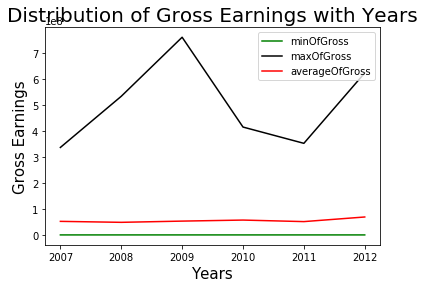

In [11]:
#Code for menu option 3:-

#  creates the function named grossEarningsDitribution()
def grossEarningsDitribution():
    while True: #this loop will keep on continuing until the user gets the desired output and breaks out 
        
#  Asks the user to enter the start year and the end year for the analysis and stores in 'start_year' & 'end_year' as integer variables respectively        
        start_year = int(input("Please enter the start and end year : \n Start Year : ") )
        end_year = int(input(" End Year: "))

#  If the start_year or end_year exists in the dataset such that end_year should be greater than end_year, than if loop will be executed        
        if len(movie_data[(movie_data.title_year == start_year) | (movie_data.title_year == end_year)]) > 0 and (start_year < end_year):
            
#  Returns the subset of movie_data containing title_year from 'start_year' to 'end_year' and stores in 'gross_Distribution'           
            gross_Distribution = movie_data[(movie_data.title_year >= start_year) & (movie_data.title_year <= end_year)]
            
        
#  Returns the dataframe named 'data' such that gross_Distribution dataframe is grouped by 'title_year' column having columns of 
#  minimum, maximum and average of gross earnings as 'minOfGross' , 'maxOfGross' and 'averageOfGross'
            data = gross_Distribution.groupby(['title_year'], as_index=False)['gross'].agg({'minOfGross':'min','maxOfGross':'max','averageOfGross':'mean'})
            data.reset_index(inplace=True)
            
#   Plots line chart such that Gross Earnings on y-axis and 'title_year' on x-axis.
#   Displaying three lines, one for max by black line, one for average by red line and one for min by green line.
            plt.plot(data['title_year'],data['minOfGross'], 'g-', data['title_year'], data['maxOfGross'],'k-',data['title_year'], data['averageOfGross'],'r-')
            plt.legend(['minOfGross','maxOfGross', 'averageOfGross'], loc = 'upper right') #assigns the legend on upper right side of the plot
            plt.title("Distribution of Gross Earnings with Years", fontsize = 20)  #assigns the title to plot
            plt.xlabel('Years', fontsize = 15)  #assigns the name of x-axis
            plt.ylabel('Gross Earnings', fontsize = 15)  #assigns the name of y-axis
            plt.show()  #plots the graph
            break  #breaks the loop as the user gets the specified output
            
#  If user enters start_year or end_year such that it does not exits in the dataset, Gives Error message and will ask to re-enter            
        else:
            print("\nInvalid Range! Please enter a valid range\n")
            continue  #will go back to the first line of the loop
            
grossEarningsDitribution()   #calls the function grossEarningsDitribution()

**ERROR HANDLING**<br>
Code does basic error handling as well.<br>
It will give an error message if user gives the invalid range of start year and end year means when user inputs start year or 
end year that does not exists in the dataset or when end year is smaller than start year. 
So, it will ask user to re-enter the start and end year i.e. a valid range.

### Menu Option 4 – Genre Analysis

This is the fourth menu of the Application.<br>
Created function called genreAnalysis() for this menu. <br>
From this menu or function, the user can have the mean IMDB Score for all movies of a specific type of Genre.<br>
In this menu, the user will be provided the list of all unique genres available in the dataset. The user can select any one of the genres from them. 

**CODE IS GIVEN BELOW**

In [12]:
#CODE FOR MENU OPTION 4 :-


#  creates the function named genreAnalysis()
def genreAnalysis():
    
#  Returns a Series object where each element in genres column is a list of strings
    test = movie_data['genres'].str.split('|')
    
#  Converts the test series to a list and stores into a variable 'test_list'
    test_list = test.tolist() 
    
#  Converts the nested test_list to a flat numpy array using 'numpy.hstack()' function   
    flatList = np.hstack(test_list)
    
#  Converts the numpy array 'flatList' to series using pd.Series() function
    unique_values = pd.Series(flatList)
    
#  Stores the unique values of series 'unique_values' to a variable, say 'uni'
    uni = unique_values.unique()
    
    while True:  #this loop will keep on continuing until the user gets the desired output and breaks out
        
#   Displays the list of Genre Name available in the dataset
        print("Available list of Genres : \n", uni)
    
#    Asks the user to enter a specific Genre Name from the list 
        genre_name = input("Please provide a specific Genre Name from the list: \n")

#   If the user given Genre Name exists in the dataset, than if loop will be executed     
        if len(movie_data[movie_data['genres'].str.contains(genre_name)]) > 0:
        
#   Returns the subset of movie_data such that it selects all those rows having user selected genre in movie_data 'genre' column           
            genre_subset = movie_data[movie_data['genres'].str.contains(genre_name)]
    
#   Displays the IMDB Score for all films within that genre      
            print("\nThe mean IMDB score for ", genre_name, "genre is: ", genre_subset['gross'].mean())
            break  #breaks the loop as the user gets the specified output
            
#  If user enters Genre Name such that it does not exits in the dataset, Gives Error message and will ask to re-enter            
        else:
            print("Invalid Genre Name! Please choose the correct Genre Name from the provided list ")
            continue  #will go back to the first line of the loop

genreAnalysis() #calls the function genreAnalysis()

Available list of Genres : 
 ['Action' 'Adventure' 'Fantasy' 'Sci-Fi' 'Thriller' 'Romance' 'Animation'
 'Comedy' 'Family' 'Musical' 'Mystery' 'Western' 'Drama' 'History' 'Sport'
 'Crime' 'Horror' 'War' 'Biography' 'Music' 'Documentary' 'Film-Noir']
Please provide a specific Genre Name from the list: 
Sport

The mean IMDB score for  Sport genre is:  45128283.25675676


**ERROR HANDLING**<br>
Code does basic error handling as well.<br>
It will give an error message if the user gives Genre name which is not availabe in the displyed list of genres to user.<br>
It will ask the user to choose the correct option from the given list of Genres.

### Menu Option 5 – Earnings and IMDB scores

This is the fifth menu of the Application.<br>
Created function called earningsImdbScores() for this menu. <br>
From this menu or say function, the user can analyse the relationship of numerical IMDB Scores with other numerical
columns/features.<br>

1) The user will be displayed the **The Cor-relational Plot**.<br>
**Cor-relational Plot** is the visual display or say plot of Cor-relational Matrix. The Cor-relational matrix 
illustrates the correlations between various numerical features in the dataset. Correlation ranges from -1 to 1.
The diagonal of the correlation matrix is always 1. <br>

2) The user will be displayed the table which illustrates the correlation of each feature with IMDB Score feature such that the cor-relation is sorted in descending order. This will help user to quickly decide which feature will be best or not with IMDB Score feature to build the model. <br>

3) The user will be displayed the plots of features with the best cor-related feature. Here, we used the Joint Plots with regression line in it to visualise the reltionship. <br>

4) The user will be displayed the plots of features which is not cor-related to IMDB Scores i.e. gives bad corelation. Here, we used the Joint Plots with regression line in it to visualise the reltionship. <br>

5) The user will be displayed the plots of features which is negatively cor-related to IMDB Scores.<br>

**CODE IS GIVEN BELOW**

The Cor-relational Plot


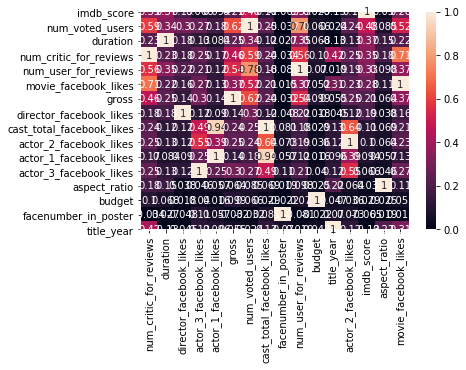

 The below table gives the strength of relation of 'IMDB Score' with other features: 
  imdb_score                   1.000000
num_voted_users              0.482430
duration                     0.366221
num_critic_for_reviews       0.347886
num_user_for_reviews         0.325003
movie_facebook_likes         0.281155
gross                        0.214740
director_facebook_likes      0.192314
cast_total_facebook_likes    0.106803
actor_2_facebook_likes       0.102372
actor_1_facebook_likes       0.093597
actor_3_facebook_likes       0.065544
aspect_ratio                 0.029979
budget                       0.029190
facenumber_in_poster        -0.065493
title_year                  -0.134982
Name: imdb_score, dtype: float64

  VISUAL EDA OF BEST COR-RELATED FEATURES WITH IMDB SCORE FEATURE 



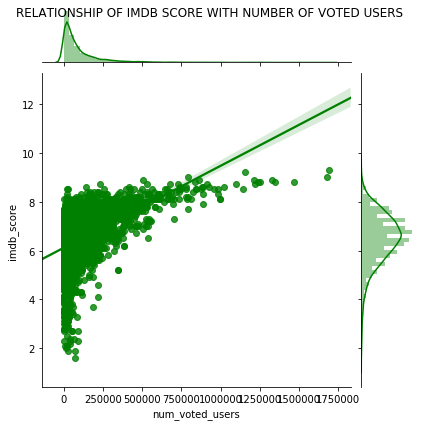

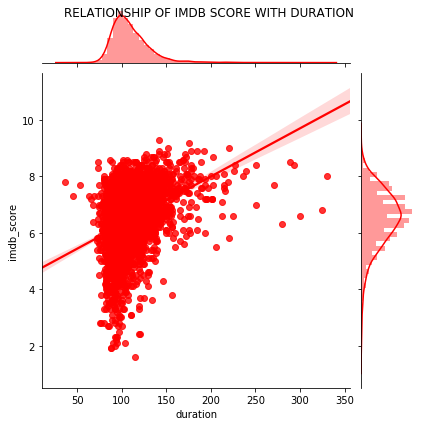

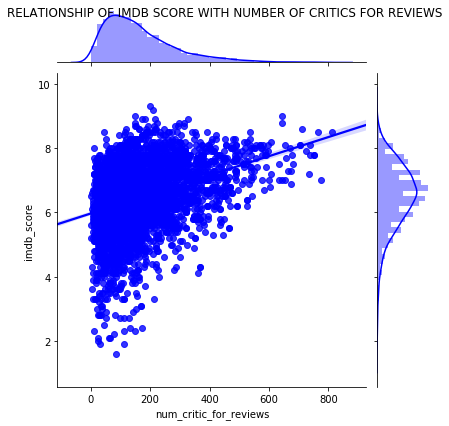

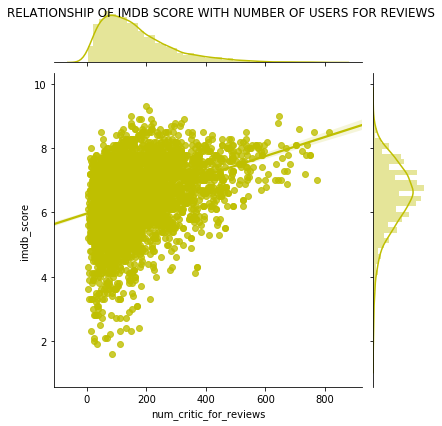


  VISUAL EDA OF NOT COR-RELATED FEATURES WITH IMDB SCORE FEATURE 



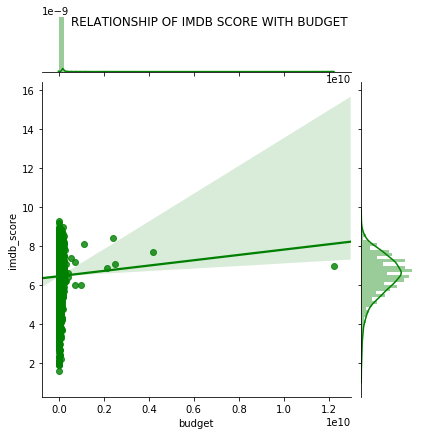

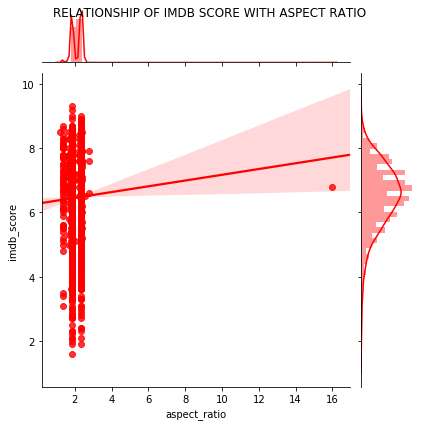

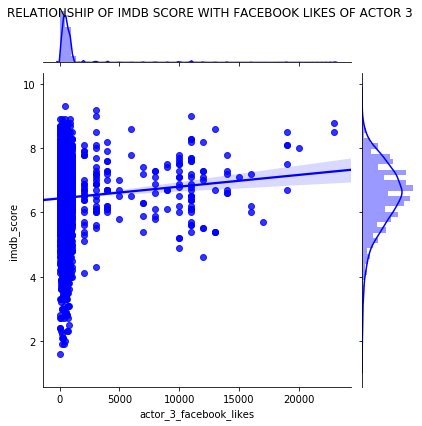

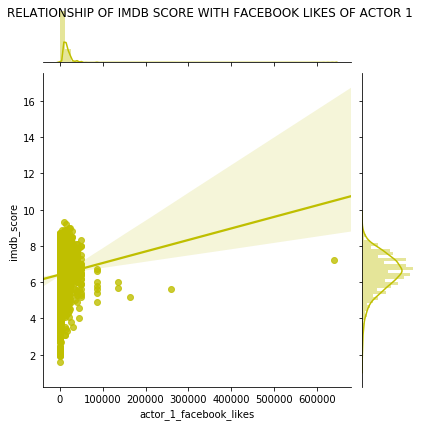


  VISUAL EDA OF NEGATIVE COR-RELATED FEATURES WITH IMDB SCORE FEATURE 



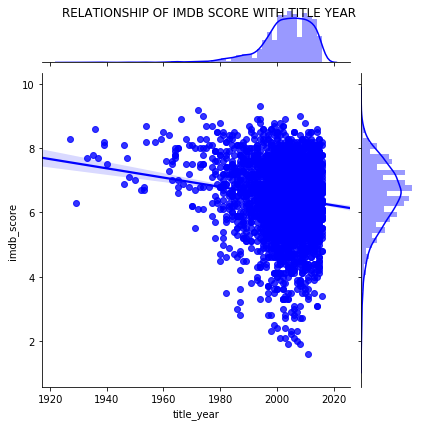

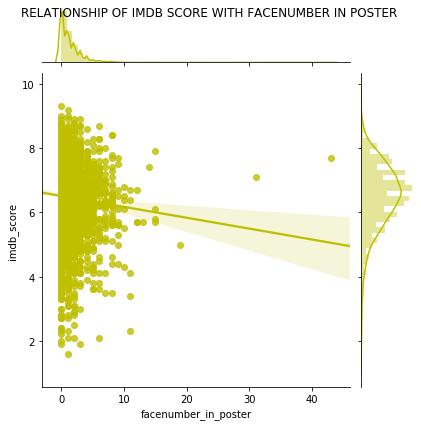

In [13]:
#CODE FOR MENU OPTION 5:-

#  creates the function named earningsImdbScores()
def earningsImdbScores():
#   extracting all the numerical columns from the dataset
    numerical_data = movie_data.select_dtypes(include=['float64','int64'])
    
#   Outputs the correlation values for each feature 
    corrResults = numerical_data.corr()
    corrResults.sort_values(['imdb_score'], ascending = False, inplace = True)

    
    print("The Cor-relational Plot")
    sns.heatmap(corrResults, annot = True, vmin = 0, vmax = 1)
    plt.show()
#   Prints the cor-relation table of IMDB Score with other features such that strong relation feature appears first
    print(" The below table gives the strength of relation of 'IMDB Score' with other features: \n ", corrResults['imdb_score'])

    

#   Prints the header to inform user below plots are the plots of best cor-related features with IMDB Scores
    print("\n  VISUAL EDA OF BEST COR-RELATED FEATURES WITH IMDB SCORE FEATURE \n")
    
#   Relation Of "IMDB Score" with "num_voted_users"
    sns.jointplot( "num_voted_users" ,"imdb_score", data= numerical_data , kind="reg", color = "g").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH NUMBER OF VOTED USERS")
    plt.show()
    
#   Relation Of "IMDB Score" with "Duration"
    sns.jointplot( "duration" ,"imdb_score", data= numerical_data , kind="reg", color = "r").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH DURATION")
    plt.show()
    
#   Relation Of "IMDB Score" with "num_critic_for_reviews"
    sns.jointplot( "num_critic_for_reviews" ,"imdb_score", data= numerical_data , kind="reg", color = "b").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH NUMBER OF CRITICS FOR REVIEWS")
    plt.show()
    
#   Relation Of "IMDB Score" with "num_user_for_reviews"
    sns.jointplot( "num_critic_for_reviews" ,"imdb_score", data= numerical_data , kind="reg", color = "y").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH NUMBER OF USERS FOR REVIEWS")
    plt.show()
    
    
    
#   Prints the header to inform user below plots are the plots of not cor-related features with IMDB Scores
    print("\n  VISUAL EDA OF NOT COR-RELATED FEATURES WITH IMDB SCORE FEATURE \n")
    
#   Relation Of "IMDB Score" with "budget"
    sns.jointplot( "budget" ,"imdb_score", data= numerical_data , kind="reg", color = "g").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH BUDGET")
    plt.show()
    
#   Relation Of "IMDB Score" with "aspect_ratio"
    sns.jointplot( "aspect_ratio" ,"imdb_score", data= numerical_data , kind="reg", color = "r").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH ASPECT RATIO")
    plt.show()
    
#   Relation Of "IMDB Score" with "actor_3_facebook_likes"
    sns.jointplot( "actor_3_facebook_likes" ,"imdb_score", data= numerical_data , kind="reg", color = "b").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH FACEBOOK LIKES OF ACTOR 3")
    plt.show()
    
#   Relation Of "IMDB Score" with "actor_1_facebook_likes"
    sns.jointplot( "actor_1_facebook_likes" ,"imdb_score", data= numerical_data , kind="reg", color = "y").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH FACEBOOK LIKES OF ACTOR 1")
    plt.show()
    
    
    
#   Prints the header to inform user below plots are the plots of negative cor-related features with IMDB Scores
    print("\n  VISUAL EDA OF NEGATIVE COR-RELATED FEATURES WITH IMDB SCORE FEATURE \n")   
    
#   Relation Of "IMDB Score" with "title_year"
    sns.jointplot( "title_year" ,"imdb_score", data= numerical_data , kind="reg", color = "b").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH TITLE YEAR")
    plt.show()
    
#   Relation Of "IMDB Score" with "facenumber_in_poster"
    sns.jointplot( "facenumber_in_poster" ,"imdb_score", data= numerical_data , kind="reg", color = "y").fig.suptitle("RELATIONSHIP OF IMDB SCORE WITH FACENUMBER IN POSTER")
    plt.show()    
    
earningsImdbScores()  #calls the function earningsImdbScores()

**OBSERVATIONS**

1) Among 15 features 13 gives positive corelation while 2 features are negatively correlated. <br>
   Positive Corelation means with the increase of IMBD Scores the other feature also increases.<br>
   While in Negative Correlation IMDB Scores decreases with increase in the other features.<br>

2) Number of voted users, Duration, Number of Critics for Reviews and Movie Facebook Likes features gives the best relation        with the IMDB Scores.<br>
   All these 4 features are right skewed i.e. positively skewed.<br>
   IMDB Scores gives symmetric histogram.<br> 

3) Remaining features does not gives good correlation with IMDB Scores.<br>

4) Title Year and facenumber_in_poster features are negatively correlated with the IMDB Score features.<br>
   Facenumber_in_poster is right skewed i.e. positively skewed.<br>
   Title Year is left skewed i.e. negatively skewed.<br>

### Menu Option 6 – EXIT

This is the sixth menu of the Application.<br>
If user opts this option than the application will exit the program.<br>
Created function called main() for this Application. <br>

From this menu or say function, the user will be displayed six menu options as directed in question.<br>
If the user selects option any one from 1 to 5 menu options, than 
each selected menu option calls the respective function to display the output.<br>
If the user selects the option 6 , than the user will be exited from the application.<br> 

**CODE FOR main() FUNCTION**

Please select one of the option : 
 1. Most successful directors or actors 
 2. Film comparison 
 3. Analyse the distribution of gross earnings 
 4. Genre Analysis 
 5. Earnings and IMDB Scores 
 6. Exit 
1
Please choose any one option: 
 1. Top Directors 
 2. Top Actors 
 2
Enter the number of top actors to be displayed 
 7

The top  7 actors with Highest Gross Earnings are 
               actor_name         gross
400  Scarlett Johansson  4.141343e+09
335      Morgan Freeman  3.938459e+09
174       Harrison Ford  3.479593e+09
306          Matt Damon  2.676850e+09
197        James Franco  2.640268e+09
62         Bruce Willis  2.550297e+09
229   John Ratzenberger  2.509861e+09


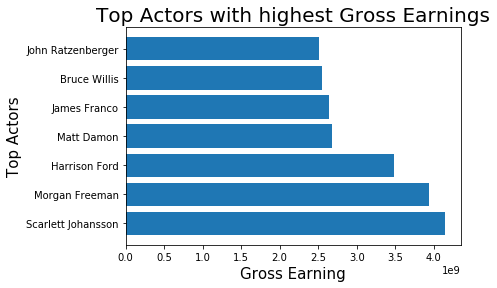

Please select one of the option : 
 1. Most successful directors or actors 
 2. Film comparison 
 3. Analyse the distribution of gross earnings 
 4. Genre Analysis 
 5. Earnings and IMDB Scores 
 6. Exit 
5
The Cor-relational Plot


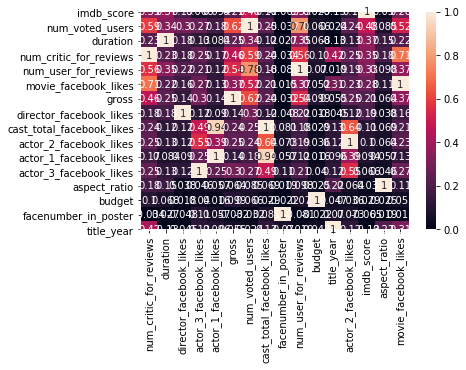

 The below table gives the strength of relation of 'IMDB Score' with other features: 
  imdb_score                   1.000000
num_voted_users              0.482430
duration                     0.366221
num_critic_for_reviews       0.347886
num_user_for_reviews         0.325003
movie_facebook_likes         0.281155
gross                        0.214740
director_facebook_likes      0.192314
cast_total_facebook_likes    0.106803
actor_2_facebook_likes       0.102372
actor_1_facebook_likes       0.093597
actor_3_facebook_likes       0.065544
aspect_ratio                 0.029979
budget                       0.029190
facenumber_in_poster        -0.065493
title_year                  -0.134982
Name: imdb_score, dtype: float64

  VISUAL EDA OF BEST COR-RELATED FEATURES WITH IMDB SCORE FEATURE 



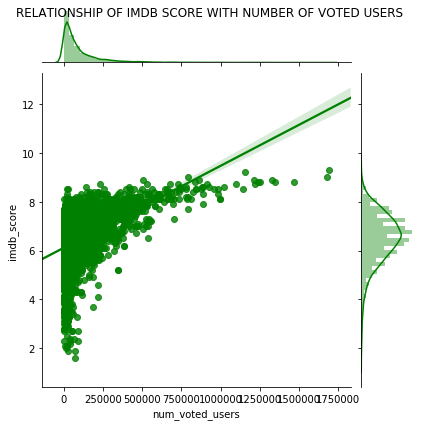

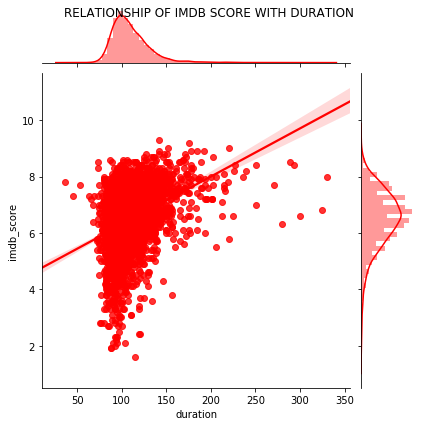

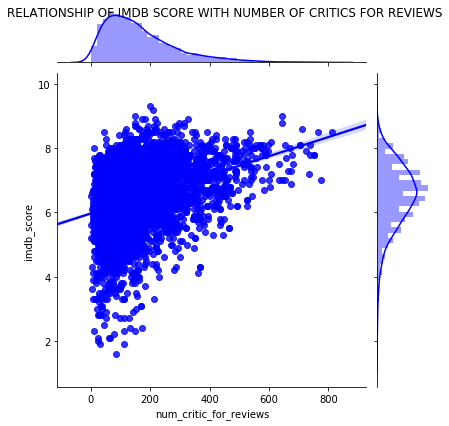

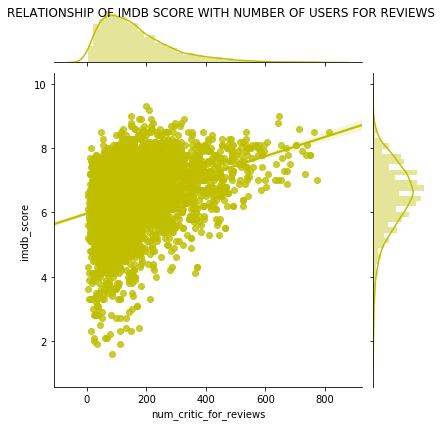


  VISUAL EDA OF NOT COR-RELATED FEATURES WITH IMDB SCORE FEATURE 



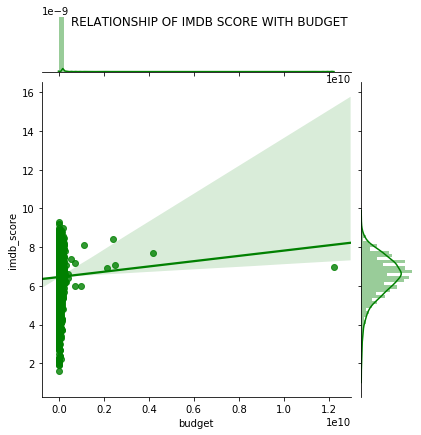

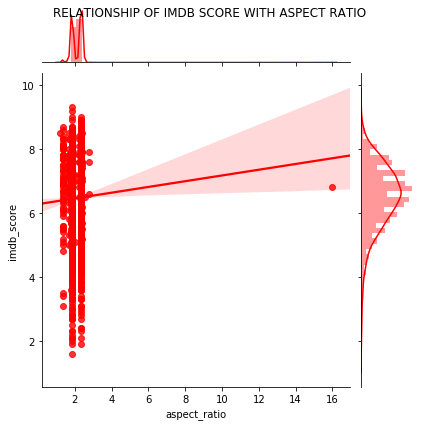

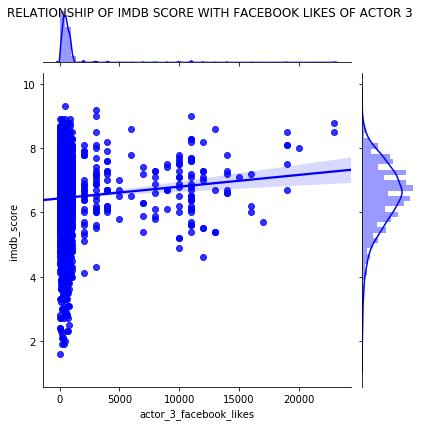

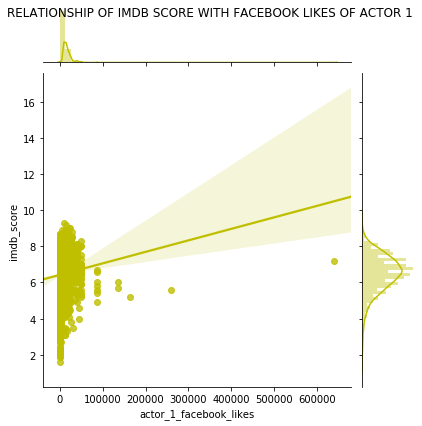


  VISUAL EDA OF NEGATIVE COR-RELATED FEATURES WITH IMDB SCORE FEATURE 



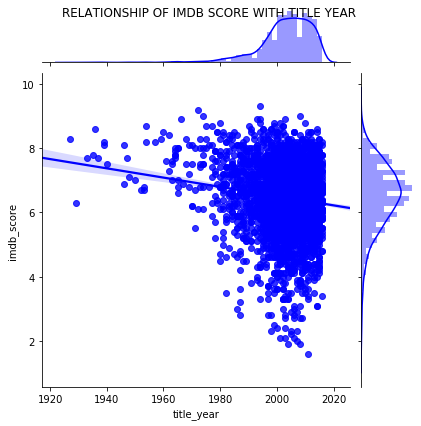

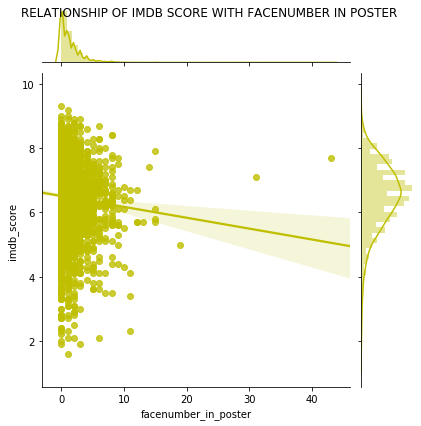

Please select one of the option : 
 1. Most successful directors or actors 
 2. Film comparison 
 3. Analyse the distribution of gross earnings 
 4. Genre Analysis 
 5. Earnings and IMDB Scores 
 6. Exit 
6
Exiting the program


In [14]:
# CODE FOR PART 6:- 

#  creates the function named main()
def main():
    
#  this loop will keep on continuing until the user gets the desired output and breaks out    
    while True:
        
#  Asks user to select any one of the 6 menu options and stores in user_input variable as integer        
        user_input = int(input("Please select one of the option : \n 1. Most successful directors or actors \n 2. Film comparison \n 3. Analyse the distribution of gross earnings \n 4. Genre Analysis \n 5. Earnings and IMDB Scores \n 6. Exit \n")) 
    
#  If the user enters any other number than provided options will get an error message and will asks to try again.       
        if user_input >6 or user_input <=0 :
            print("Invalid Option. Please choose correct option")
            continue  #will go back to the first line of the loop
            
#  If the user selects option 1          
        elif user_input == 1:
            successfullDirectorsActors()  #calls the function and gives otput accordingly
            continue  #will go back to the first line of the loop
            
#  If the user selects option 2 
        elif user_input == 2:
            filmComparision()  #calls the function and gives otput accordingly
            continue  #will go back to the first line of the loop
            
#  If the user selects option 3            
        elif user_input == 3:
            grossEarningsDitribution()  #calls the function and gives otput accordingly
            continue  #will go back to the first line of the loop
            
#  If the user selects option 4            
        elif user_input == 4:
            genreAnalysis()  #calls the function and gives otput accordingly
            continue  #will go back to the first line of the loop
            
#  If the user selects option 5            
        elif user_input == 5:
            earningsImdbScores()  #calls the function and gives otput accordingly
            continue  #will go back to the first line of the loop
            
#  If the user selects option 6            
        elif user_input == 6:
            print("Exiting the program")  #calls the function and gives otput accordingly
            break  #breaks the loop, so user will be exited from the application
            
main()  #calls the function main()

**ERROR HANDLING**<br>
Code does basic error handling as well.<br>
It will give an error message if the user selects invalid option that is other than the 6 options provided.<br>
It will ask the user to choose the correct option.

### LEARNING OUTCOMES WHILE WORKING ON THIS PROJECT

1) Use of Pandas. It is convenient to work on complex data with the help of Pandas.(Python Data Analysis Library)<br>
2) Pandas provides high performance and also primarily used for data cleaning and manipulation.<br>
3) Use of NumPy. Used NumPy library in part 4 i.e while progaming for menu option 4. <br>
NumPy is used to deal with numeric matrices and vectors in Python.<br>
4) Importance of functions(). We can achive cohession by making functions.It makes the code clean, modular and independent from each other.